# Pratique de pandas: un exemple complet

Dans ce tutoriel `pandas`, nous allons utiliser:

* Les émissions de gaz à effet de serre estimées au niveau communal par l'ADEME. Le jeu de données est 
disponible sur [data.gouv](https://www.data.gouv.fr/fr/datasets/inventaire-de-gaz-a-effet-de-serre-territorialise/#_)
et requêtable directement dans python avec
[cet url](https://koumoul.com/s/data-fair/api/v1/datasets/igt-pouvoir-de-rechauffement-global/convert)
* Quelques données de contexte au niveau communal. Idéalement, on utiliserait les données
[disponibles sur le site de l'Insee](https://www.insee.fr/fr/statistiques/3560121). Pour faciliter l'import de celles-ci, les données ont été mises à disposition dans le dépôt github, [sur cet url](https://github.com/linogaliana/python-datascientist/blob/pandas_intro/data/filosofi_2016.csv)


:warning: `pandas` offre la possibilité d'importer des données directement depuis un url. C'est l'option
prise dans ce tutoriel.
Si vous préfèrez, pour des
raisons d'accès au réseau ou de performance, importer depuis un poste local,
vous pouvez télécharger les données et changer
les commandes d'import avec le chemin adéquat plutôt que l'url. 

Nous suivrons les conventions habituelles dans l'import des packages


In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Exploration de la structure des données

Commencer par importer les données de l'Ademe à l'aide du package `pandas`. Vous pouvez les nommer `df`

In [5]:
df = pd.read_csv("https://koumoul.com/s/data-fair/api/v1/datasets/igt-pouvoir-de-rechauffement-global/convert")

Pour les données de cadrage au niveau communal (source Insee), une version arrangée et facile à requêter est fournie sur [github](https://github.com/linogaliana/python-datascientist/blob/pandas_intro/data/filosofi_2016.csv)

In [6]:
df_city = pd.read_csv("https://raw.githubusercontent.com/linogaliana/python-datascientist/pandas_intro/data/filosofi_2016.csv")

/opt/conda/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


**Exercice 1: Afficher des données**

L'objectif de cet exercice est de vous amener à afficher des informations sur les données dans un bloc de code (notebook) ou dans la console
    
Commencer sur `df`: 

    * Utiliser les méthodes adéquates pour les 10 premières valeurs, les 15 dernières et un échantillon aléatoire de 10 valeurs
    * Tirer 5 pourcent de l'échantillon sans remise
    * Ne conserver que les 10 premières lignes et tirer aléatoirement dans celles-ci pour obtenir un DataFrame de 100 données.
    * Faire 100 tirages à partir des 6 premières lignes avec une probabilité de 1/2 pour la première observation et une probabilité uniforme pour les autres
    
Faire la même chose sur `df_city`

In [7]:
df.head(10)
df.tail(15)
df.sample(10)
df.sample(frac = 0.05)
df[:10].sample(n = 100, replace = True)
df[:6].sample(n = 100, replace = True, weights = [0.5] + [0.1]*5)

,INSEE commune,Commune,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire
2,01004,AMBERIEU-EN-BUGEY,499.043526,212.577909,NaN,10313.446520,5314.314445,998.332482,2930.354461,16616.822530,15642.420310,10732.376930
0,01001,L'ABERGEMENT-CLEMENCIAT,3711.425991,NaN,NaN,432.751835,101.430476,2.354558,6.911213,309.358195,793.156501,367.036172
3,01005,AMBERIEUX-EN-DOMBES,1859.160954,NaN,NaN,1144.429311,216.217508,94.182310,276.448534,663.683146,1756.341319,782.404357
0,01001,L'ABERGEMENT-CLEMENCIAT,3711.425991,NaN,NaN,432.751835,101.430476,2.354558,6.911213,309.358195,793.156501,367.036172
3,01005,AMBERIEUX-EN-DOMBES,1859.160954,NaN,NaN,1144.429311,216.217508,94.182310,276.448534,663.683146,1756.341319,782.404357
...,...,...,...,...,...,...,...,...,...,...,...,...
4,01006,AMBLEON,448.966808,NaN,NaN,77.033834,48.401549,NaN,NaN,43.714019,398.786800,51.681756
0,01001,L'ABERGEMENT-CLEMENCIAT,3711.425991,NaN,NaN,432.751835,101.430476,2.354558,6.911213,309.358195,793.156501,367.036172
2,01004,AMBERIEU-EN-BUGEY,499.043526,212.577909,NaN,10313.446520,5314.314445,998.332482,2930.354461,16616.822530,15642.420310,10732.376930
0,01001,L'ABERGEMENT-CLEMENCIAT,3711.425991,NaN,NaN,432.751835,101.430476,2.354558,6.911213,309.358195,793.156501,367.036172


In [8]:
df_city.head(10)
df_city.tail(15)
df_city.sample(10)
df_city.sample(frac = 0.05)
df_city[:10].sample(n = 100, replace = True)
df_city[:6].sample(n = 100, replace = True, weights = [0.5] + [0.1]*5)

,CODGEO,LIBGEO,NBMENFISC16,NBPERSMENFISC16,MED16,PIMP16,TP6016,TP60AGE116,TP60AGE216,TP60AGE316,...,PPEN16,PPAT16,PPSOC16,PPFAM16,PPMINI16,PPLOGT16,PIMPOT16,D116,D916,RD16
0,01001,L'Abergement-Clémenciat,313.0,795.5,22679.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01002,L'Abergement-de-Varey,101.0,248.0,24382.083333,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,01001,L'Abergement-Clémenciat,313.0,795.5,22679.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,01001,L'Abergement-Clémenciat,313.0,795.5,22679.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,01001,L'Abergement-Clémenciat,313.0,795.5,22679.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,01001,L'Abergement-Clémenciat,313.0,795.5,22679.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01004,Ambérieu-en-Bugey,6363.0,14228.0,19721.000000,49.0,17.0,19.0,22.0,22.0,...,27.0,8.8,6.9,2.8,2.1,2.0,-15.7,10457.083333,33880.555556,3.239962
5,01007,Ambronay,1087.0,2684.0,22146.451613,57.0,NaN,NaN,NaN,NaN,...,27.2,8.1,4.2,2.4,1.0,0.8,-15.0,13947.000000,34914.782609,2.503390
3,01005,Ambérieux-en-Dombes,633.0,1662.5,23378.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Cette première approche exploratoire donne une idée assez précise de la manière dont les données sont organisées. On remarque ainsi une différence entre `df` et `df_city` quant aux valeurs manquantes: la première base est relativement complète, la seconde comporte beaucoup de valeurs manquantes. Autrement dit, si on désire exploiter `df_city`, il faut faire attention à la variable choisie.

**Exercice 2: structure des données**

La première chose à vérifier est le format des données, afin d'identifier des types de variables qui ne conviennent pas. Ici, comme c'est `pandas` qui a géré automatiquement les types de variables, il y a peu de chances que les types ne soient pas adéquats mais une vérification ne fait pas de mal.

* Vérifier les types des variables. S'assurer que les types des variables communes aux deux bases soient cohérents.

Ensuite, on vérifie les dimensions des `DataFrames` et la structure de certaines variables clé. En l'occurrence, les variables fondamentales pour lier nos données sont les variables communales. Ici, on a deux variables géographiques: un code commune et un nom de commune. 

* Vérifier les dimensions des DataFrames
* Vérifier le nombre de valeurs uniques des variables géographiques dans chaque base. Les résultats apparaissent-ils cohérents ?
* Identifier les libellés pour lesquels on a plusieurs codes communes dans `df_city` et les stocker dans un vecteur `x` (conseil: faire attention à l'index de `x`)

On se focalise temporairement sur les observations où le libellé comporte plus de deux codes communes différents

* Regarder dans `df_city` ces observations
* Pour mieux y voir, réordonner la base obtenue par order alphabétique
* Déterminer la taille moyenne (variable nombre de personnes: `NBPERSMENFISC16`) et quelques statistiques descriptives de ces données. Comparer aux mêmes statistiques sur les données où libellés et codes communes coïncident
* Vérifier sur les grandes villes (plus de 100 000 personnes), la proportion de villes où libellés et codes communes ne coïncident pas. Identifier ces observations.
* Vérifier dans `df_city` les villes dont le libellé est égal à Montreuil. Vérifier également celles qui contiennent le terme 'Saint-Denis'

In [9]:
df.dtypes
df_city.dtypes

CODGEO              object
LIBGEO              object
NBMENFISC16        float64
NBPERSMENFISC16    float64
MED16              float64
PIMP16             float64
TP6016             float64
TP60AGE116         float64
TP60AGE216         float64
TP60AGE316         float64
TP60AGE416         float64
TP60AGE516         float64
TP60AGE616         float64
TP60TOL116         float64
TP60TOL216         float64
PACT16             float64
PTSA16             float64
PCHO16             float64
PBEN16             float64
PPEN16             float64
PPAT16             float64
PPSOC16            float64
PPFAM16            float64
PPMINI16           float64
PPLOGT16           float64
PIMPOT16           float64
D116               float64
D916               float64
RD16               float64
dtype: object

In [10]:
df[['INSEE commune', 'Commune']].nunique()
df_city[['CODGEO', 'LIBGEO']].nunique()
# Résultats dont l'ordre de grandeur est proche. Dans les deux cas, #(libelles) < #(code)

CODGEO    34932
LIBGEO    32676
dtype: int64

In [11]:
x = df_city.groupby('LIBGEO').count()['CODGEO']
x = x[x>1]
x = x.reset_index()
x

,LIBGEO,CODGEO
0,Abancourt,2
1,Aboncourt,2
2,Abzac,2
3,Achères,2
4,Aiglun,2
...,...,...
1446,Épieds,3
1447,Étaules,2
1448,Éterpigny,2
1449,Étréchy,3


In [12]:
df_city[df_city['LIBGEO'].isin(x['LIBGEO'])]
df_city[df_city['LIBGEO'].isin(x['LIBGEO'])].sort_values('LIBGEO')

,CODGEO,LIBGEO,NBMENFISC16,NBPERSMENFISC16,MED16,PIMP16,TP6016,TP60AGE116,TP60AGE216,TP60AGE316,...,PPEN16,PPAT16,PPSOC16,PPFAM16,PPMINI16,PPLOGT16,PIMPOT16,D116,D916,RD16
21815,59001,Abancourt,182.0,477.0,22772.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
22463,60001,Abancourt,249.0,605.5,18545.625000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20781,57001,Aboncourt,125.0,339.0,20887.200000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19449,54003,Aboncourt,48.0,109.5,18586.153846,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12323,33001,Abzac,801.0,1880.5,18786.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6118,18090,Étréchy,191.0,433.0,19814.666667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
34440,91226,Étréchy,2756.0,6585.0,25032.500000,70.0,6.0,NaN,NaN,NaN,...,35.0,8.5,2.8,1.5,0.7,0.6,-18.8,14681.714286,39019.333333,2.657682
18388,51239,Étréchy,46.0,111.5,21155.238095,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
30178,77173,Étrépilly,291.0,831.5,23500.800000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_city[df_city['LIBGEO'].isin(x['LIBGEO'])]['NBPERSMENFISC16'].describe()
df_city[~df_city['LIBGEO'].isin(x['LIBGEO'])]['NBPERSMENFISC16'].describe()

count    2.810300e+04
mean     2.192490e+03
std      1.603009e+04
min      7.600000e+01
25%      2.545000e+02
50%      5.420000e+02
75%      1.320250e+03
max      2.074630e+06
Name: NBPERSMENFISC16, dtype: float64

In [14]:
df_big_city = df_city[df_city['NBPERSMENFISC16']>100000]
df_big_city['probleme'] = df_big_city['LIBGEO'].isin(x['LIBGEO'])
df_big_city['probleme'].mean()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0.08333333333333333

In [15]:
df_big_city[df_big_city['probleme']]

,CODGEO,LIBGEO,NBMENFISC16,NBPERSMENFISC16,MED16,PIMP16,TP6016,TP60AGE116,TP60AGE216,TP60AGE316,...,PPAT16,PPSOC16,PPFAM16,PPMINI16,PPLOGT16,PIMPOT16,D116,D916,RD16,probleme
34622,93048,Montreuil,43996.0,108682.0,18428.000000,55.0,26.0,29.0,23.0,30.0,...,6.3,7.5,2.5,2.8,2.2,-18.4,8553.333333,37583.000000,4.393959,True
34634,93066,Saint-Denis,39469.0,108346.5,14621.500000,39.0,38.0,35.0,36.0,43.0,...,3.9,13.2,4.5,4.8,4.0,-13.9,7424.615385,28602.666667,3.852411,True
34918,97411,Saint-Denis,57567.0,145395.5,16317.333333,35.0,34.0,47.0,38.0,36.0,...,7.6,13.3,3.6,6.2,3.5,-14.7,8189.600000,40407.777778,4.934036,True
34922,97415,Saint-Paul,37064.0,105829.0,16279.354839,35.0,33.0,42.0,34.0,36.0,...,8.2,12.1,3.4,6.8,1.9,-14.6,7962.424242,39826.000000,5.001743,True


In [16]:
df_city[df_city.LIBGEO == 'Montreuil']
df_city[df_city.LIBGEO.str.contains('Saint-Denis')].head(10)

,CODGEO,LIBGEO,NBMENFISC16,NBPERSMENFISC16,MED16,PIMP16,TP6016,TP60AGE116,TP60AGE216,TP60AGE316,...,PPEN16,PPAT16,PPSOC16,PPFAM16,PPMINI16,PPLOGT16,PIMPOT16,D116,D916,RD16
290,01344,Saint-Denis-lès-Bourg,2562.0,6036.0,23258.000000,63.0,7.0,NaN,NaN,NaN,...,35.2,10.6,3.7,1.9,0.9,0.8,-17.0,13560.00000,40126.666667,2.959194
291,01345,Saint-Denis-en-Bugey,965.0,2280.0,21464.000000,53.0,NaN,NaN,NaN,NaN,...,32.4,8.2,3.9,2.2,0.9,0.9,-14.4,12929.52381,34075.333333,2.635467
1177,02818,Villiers-Saint-Denis,365.0,901.0,22221.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3906,11339,Saint-Denis,224.0,473.5,18477.142857,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4824,14571,Saint-Denis-de-Mailloc,124.0,298.5,20859.523810,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4825,14572,Saint-Denis-de-Méré,331.0,770.5,20080.000000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5874,17323,Saint-Denis-d'Oléron,733.0,1401.0,21364.166667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6231,18204,Saint-Denis-de-Palin,125.0,314.5,21446.500000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7031,21442,Morey-Saint-Denis,285.0,663.5,25945.714286,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8518,25129,Chassagne-Saint-Denis,50.0,116.0,21356.666667,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ce petit exercice permet de se rassurer car les libellés dupliqués sont en fait des noms de commune identiques mais qui ne sont pas dans le même département. Il ne s'agit donc pas d'observations dupliquées. On se fiera ainsi aux codes communes, qui eux sont uniques. 

**Exercice 3: Les indices**

A partir de l'exercice précédent, on peut se fier aux codes communes.

* Fixer comme indice la variable de code commune dans les deux bases. Regarder le changement que cela induit sur le *display* du dataframe
* Les deux premiers chiffres des codes communes sont le numéro de département. Créer une variable de département `dep` dans `df`
* Calculer les émissions totales par secteur pour chaque département. Mettre en log ces résultats dans un objet `df_log`. Garder 5 départements et produire un barplot
* Repartir de `df`. Calculer les émissions totales par département et sortir la liste des 10 principaux émetteurs de CO2 et des 5 départements les moins émetteurs. Sans faire de *merge*, regarder les caractéristiques de ces départements (population et niveau de vie)

In [17]:
df = df.set_index('INSEE commune')
df_city =  df_city.set_index('CODGEO') 

In [18]:
df['dep'] = df.index.str[:2]
df_city['dep'] = df_city.index.str[:2]

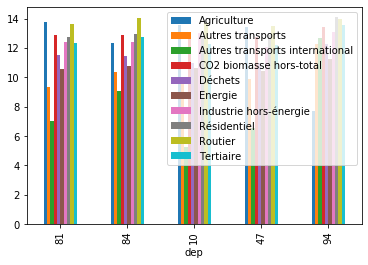

In [19]:
df_log = df.groupby('dep').sum().apply(np.log)
df_log.sample(5).plot(kind = "bar")

In [20]:
df

,Commune,Agriculture,Autres transports,Autres transports international,CO2 biomasse hors-total,Déchets,Energie,Industrie hors-énergie,Résidentiel,Routier,Tertiaire,dep
INSEE commune,,,,,,,,,,,,
01001,L'ABERGEMENT-CLEMENCIAT,3711.425991,NaN,NaN,432.751835,101.430476,2.354558,6.911213,309.358195,793.156501,367.036172,01
01002,L'ABERGEMENT-DE-VAREY,475.330205,NaN,NaN,140.741660,140.675439,2.354558,6.911213,104.866444,348.997893,112.934207,01
01004,AMBERIEU-EN-BUGEY,499.043526,212.577909,NaN,10313.446520,5314.314445,998.332482,2930.354461,16616.822530,15642.420310,10732.376930,01
01005,AMBERIEUX-EN-DOMBES,1859.160954,NaN,NaN,1144.429311,216.217508,94.182310,276.448534,663.683146,1756.341319,782.404357,01
01006,AMBLEON,448.966808,NaN,NaN,77.033834,48.401549,NaN,NaN,43.714019,398.786800,51.681756,01
...,...,...,...,...,...,...,...,...,...,...,...,...
95676,VILLERS-EN-ARTHIES,1628.065094,NaN,NaN,165.045396,65.063617,11.772789,34.556067,176.098160,309.627908,235.439109,95
95678,VILLIERS-ADAM,698.630772,NaN,NaN,1331.126598,111.480954,2.354558,6.911213,1395.529811,18759.370070,403.404815,95
95680,VILLIERS-LE-BEL,107.564967,NaN,NaN,8367.174532,225.622903,534.484607,1568.845431,22613.830250,12217.122400,13849.512000,95


In [21]:
df_emissions = df.reset_index().set_index(['INSEE commune','dep']).sum(axis = 1).groupby('dep').sum()
gros_emetteurs = df_emissions.sort_values(ascending = False).head(10)
petits_emetteurs = df_emissions.sort_values().head(5)

In [22]:
df_city[df_city['dep'].isin(gros_emetteurs.index)][['NBPERSMENFISC16','MED16']].sum()
df_city[df_city['dep'].isin(gros_emetteurs.index)][['NBPERSMENFISC16','MED16']].mean()

NBPERSMENFISC16     3343.578037
MED16              21566.107365
dtype: float64

In [23]:
df_city[df_city['dep'].isin(petits_emetteurs.index)][['NBPERSMENFISC16','MED16']].sum()
df_city[df_city['dep'].isin(petits_emetteurs.index)][['NBPERSMENFISC16','MED16']].mean()

NBPERSMENFISC16      994.939959
MED16              19350.103423
dtype: float64

**Exercice 4: performance des indices**

Un des intérêts des indices est qu'il permettent des agrégations efficaces. 

* Repartir de `df` et créer une copie `df_copy = df.copy()` et `df_copy2 = df.copy()` afin de ne pas écraser le DataFrame `df`
* Utiliser la variable `dep` comme indice pour `df_copy` et retirer tout index pour `df_copy2`
* Importer le module `timeit` et comparer le temps d'exécution de la somme par secteur, pour chaque département, des émissions de CO2

In [24]:
df_copy = df.copy()
df_copy2 = df.copy()
df_copy = df_copy.set_index('dep')
df_copy2 = df_copy2.reset_index()

In [25]:
%timeit df_copy.drop('Commune', axis = 1).groupby('dep').sum()

3.9 ms ± 154 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [26]:
%timeit df_copy2.drop('Commune', axis = 1).groupby('dep').sum()

7.19 ms ± 486 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


# Combiner les données

Exercice: calculer l'empreinte carbone par habitant